In [1]:
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve
import sympy as sp
import numpy as np

Part 1 problem no. 1 and 4 :

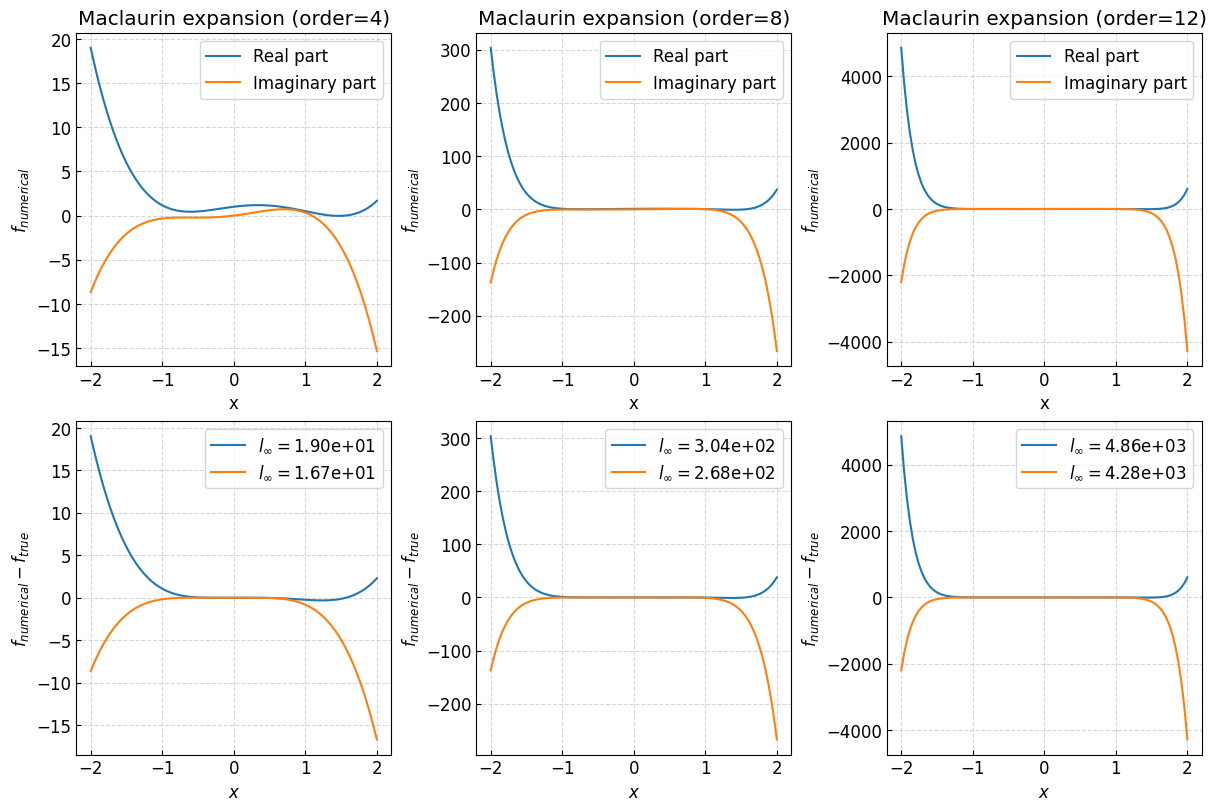

In [139]:
"""
Name: maclaurin series plotter
Purpose: this calculates the maclaurin series expansion of a passed function
         and plots the real and imaginary parts along with the difference in
         true function and the approximation (it also reports the l-inf norm).
         Also, prints maclaurin series in next cell.
Author: Joshua Belieu | Fletch
Date written: 2025-09-01
Last modified: 2025-09-10
Inputs:
- x,y,z,... : sympy symbol. the dependant variable of the desired function. 
- f: sympy expression. the function to approximate in sympy format.
- x_arr : numpy array. the numerical array of the dependant variable(s).
- f_arr_true : numpy array. the numerical array of the desired function.
- order_list : list of ints. the orders of the derivative to expand to 
               (inclusive)
Outputs:
- plot : plot. a 2 row x len(order_list) subplot of the expressions (top row)
         and the difference in the true and approximate functions with l-inf
         norn (bottom row).
Dependencies:
- none.
"""

'''
establish variable and function.
'''

x = sp.symbols ( 'x' )
f = sp.exp ( (1 + 1j) * x ) / ( 1 + x ** 2 )

'''
numerical x interval for evaluation and true solution for comparison of
numerical approximation
'''

x_arr = np.linspace ( -2 , 2 , int ( 1e2 ))
f_arr_true = np.exp( (1 + 1j) * x_arr ) / ( 1 + x_arr ** 2 )

'''
list of derivative order for M.S.E.
'''

order_list = [ 4 , 8 , 12 ]

fig,axs = plt.subplots ( 2 , len ( order_list ),
                       figsize = ( 12 , 8 ),
                       constrained_layout = True )

plt.rcParams.update({'font.size': 12})

expression_list = []

for idx , order in enumerate ( order_list ) :

    '''
    do a series expansion of f(x) at x=0 with order (inclusive). remove the
    omicron and simplify the expression. then, make it an evaluatable expresion
    that returns a numpy array.
    '''

    maclaurin_expansion = sp.series ( f , x , 0 , order + 1 )
    maclaurin_expansion_sympy = sp.simplify(maclaurin_expansion.removeO())
    maclaurin_expansion_func = sp.lambdify( x, maclaurin_expansion_sympy, 'numpy' )

    expression_list.append( maclaurin_expansion_sympy )

    '''
    get numerical form, and extract max norm for real and imaginary parts.
    '''

    f_arr = maclaurin_expansion_func( x_arr )
    l_inf_real = np.max( np.abs( f_arr.real-f_arr_true.real ) )
    l_inf_imag = np.max( np.abs( f_arr.imag-f_arr_true.imag ) )

    '''
    plot!
    '''

    axs[0][idx].plot( x_arr, f_arr.real, label=f'Real part' )
    axs[0][idx].plot( x_arr, f_arr.imag, label=f'Imaginary part' )
    axs[0][idx].set_title( f'Maclaurin expansion (order={order})' )
    axs[0][idx].set_xlabel('x')
    axs[0][idx].set_ylabel(r'$f_{numerical}$')
    axs[0][idx].grid(ls='--',alpha=0.5)
    axs[0][idx].legend()

    axs[1][idx].plot( x_arr, f_arr.real-f_arr_true.real,label= fr'$l_\infty=${l_inf_real:.2e}' )
    axs[1][idx].plot( x_arr, f_arr.imag-f_arr_true.imag,label=fr'$l_\infty=${l_inf_imag:.2e}' )
    axs[1][idx].set_xlabel('$x$')
    axs[1][idx].set_ylabel(r'$f_{numerical}-f_{true}$')
    axs[1][idx].grid(ls='--',alpha=0.5)
    axs[1][idx].legend();

for row in axs :
    for col in row :
        col.tick_params(axis='both',which='both', direction='in')


In [140]:
for expr in expression_list :

    print(expr)

1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
1.0*x**8*(0.833730158730159 - 0.988888888888889*I) - 1.0*x**7*(1.2984126984127 + 0.634920634920635*I) + 1.0*x**6*(-0.833333333333333 + 0.988888888888889*I) + 1.0*x**5*(1.3 + 0.633333333333333*I) + 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
1.0*x**12*(0.833730025118914 - 0.988897707231041*I) - 1.0*x**11*(1.29845759179093 + 0.634963924963925*I) + 1.0*x**10*(-0.833730158730159 + 0.988897707231041*I) + 1.0*x**9*(1.29845679012346 + 0.634964726631393*I) + 1.0*x**8*(0.833730158730159 - 0.988888888888889*I) - 1.0*x**7*(1.2984126984127 + 0.634920634920635*I) + 1.0*x**6*(-0.833333333333333 + 0.988888888888889*I) + 1.0*x**5*(1.3 + 0.633333333333333*I) + 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0

In [141]:
"""
Name: compare results
Purpose: compare the results of the sympy and LLM outputs
Author: Your Name
Date written: 2025-09-01
Last modified: 2025-09-10
Inputs:
- ai_expressions : list of strings. the generated maclaurin series from the LLM
                   in string format
- expression_list : list of strings. the sympy generated maclaurin series in 
                    string format
Outputs:
- diff : a printout of the order of derivative, the two expressions, and their
         difference.
Dependencies:
- maclaurin series plotter (this generates the expression list)
"""

'''
ChatGPT 5.0 expressions from the first week of school (I forgot to take down 
the exact date and I can't find it on GPT's site.)
'''

ai_expressions = [
"1 + (1+1j)*x + (-1+1j)*x**2 + (-4/3 - (2/3)*1j)*x**3 + (5/6 - 1j)*x**4",
"1 + (1+1j)*x + (-1+1j)*x**2 + (-4/3 - (2/3)*1j)*x**3 + (5/6 - 1j)*x**4 "
                "+ (13/10 + (19/30)*1j)*x**5 + (-5/6 + (89/90)*1j)*x**6 "
                "+ (-409/315 - (40/63)*1j)*x**7 + (2101/2520 - (89/90)*1j)*x**8",
"1 + (1+1j)*x + (-1+1j)*x**2 + (-4/3 - (2/3)*1j)*x**3 + (5/6 - 1j)*x**4 "
                "+ (13/10 + (19/30)*1j)*x**5 + (-5/6 + (89/90)*1j)*x**6 "
                "+ (-409/315 - (40/63)*1j)*x**7 + (2101/2520 - (89/90)*1j)*x**8 "
                "+ (4207/3240 + (14401/22680)*1j)*x**9 "
                "+ (-2101/2520 + (112141/113400)*1j)*x**10 "
                "+ (-202462/155925 - (44003/69300)*1j)*x**11 "
                "+ (6239969/7484400 - (112141/113400)*1j)*x**12"
]



for i in range ( len ( expression_list ) ) :
    
    sympy_expression = expression_list [ i ]
    ai_expression = sp.sympify ( ai_expressions [ i ] )

    print(f'Order {order_list[i]} comparison:')
    print(f'Sympy expression: {sympy_expression}')
    print(f'AI expression:    {ai_expression}')
    print(f'Sympy - AI {sp.simplify ( sympy_expression - ai_expression )}')
    print('')



Order 4 comparison:
Sympy expression: 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
AI expression:    x**4*(5/6 - I) + x**3*(-4/3 - 2*I/3) + x**2*(-1 + I) + x*(1 + I) + 1
Sympy - AI 0

Order 8 comparison:
Sympy expression: 1.0*x**8*(0.833730158730159 - 0.988888888888889*I) - 1.0*x**7*(1.2984126984127 + 0.634920634920635*I) + 1.0*x**6*(-0.833333333333333 + 0.988888888888889*I) + 1.0*x**5*(1.3 + 0.633333333333333*I) + 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
AI expression:    x**8*(2101/2520 - 89*I/90) + x**7*(-409/315 - 40*I/63) + x**6*(-5/6 + 89*I/90) + x**5*(13/10 + 19*I/30) + x**4*(5/6 - I) + x**3*(-4/3 - 2*I/3) + x**2*(-1 + I) + x*(1 + I) + 1
Sympy - AI -9.02276489854095e-17*I*x**3

Order 12 comparison:
Sympy expression: 1.0*x**12*(0.833730025118914 - 0.988897707231041*I) - 1.0*x**11*(1.29845759179093 + 0.63496

Part 1 problem no. 2 :

In [2]:
def fd_weights ( offsets , order , show_system = False ) :

    global s , A

    """
    Name          : fd_weights -> finite difference weights
    Purpose       : calculate the set of coefficients for a finite difference
                    approximation of the order-th derivative using the given
                    offsets. We are essentually solving the linear system
                    A c = b, where A is the Vandermonde matrix of the offsets,
                    c is the vector of coefficients we want to find, and b is
                    a vector of zeros with a factorial(order) in the order-th
                    position.
    Author          : christlieb, augmented by Joshua Belieu.
    Date augmented  : 2025-08-26
    Last modified   : 2025-08-26
    Inputs :
        - offsets     : list. list of offsets (in units of grid stride h)
        - order       : int. order of derivative to approximate
        - show_system : bool. if True, print the system of equations being
                        solved. default is False.
    Outputs:
        - <ret>: <type> ... <meaning/units/shape>
    Dependencies:
        - None.
    """

    '''
    list of offsets (in units of grid stride h), nsimplify allows floats.
    '''

    s = [ sp.nsimplify ( offset ) for offset in offsets ]
    m = len ( s )

    '''
    the Vandermonde matrix of the offsets. the "A" in our system Ac = b
    '''

    A = sp.Matrix ([[ s[j] ** k for j in range ( m ) ] for k in range ( m )])

    '''
    a vector of zeros with a factorial(order) in the order-th position. the 
    "b" in our system Ac = b.
    '''

    b = sp.Matrix ( [ 0 ] * m )
    b [ order ] = sp.factorial ( order )

    '''
    the coefficients we want to find. the "c" in our system Ac = b. LUsolve is 
    a decomposition method that splits A into a lower and upper triangular matrix
    and solves the system (Ux=y and Ly=c) in two steps.
    '''

    c = A.LUsolve ( b )

    if show_system :

        system = sp.Eq( sp.MatMul ( A , c , evaluate = False ) , b )
        sp.pprint(system)

    return sp.simplify ( c )

'''
unit test :    
'''

fd_weights ( [ -1 , 0 , 1 ] , 2 )


Matrix([
[ 1],
[-2],
[ 1]])

In [143]:
offsets = [ -3 , -2 , -1 , 0 , 1 ]
order = 1

weights = fd_weights ( offsets , order , True ).T
weights # the c vector here is actually d in the hw, so c would be d/h!

⎡ 1   1   1   1  1⎤ ⎡-1/12⎤   ⎡0⎤
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎢-3   -2  -1  0  1⎥ ⎢ 1/2 ⎥   ⎢1⎥
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎢ 9   4   1   0  1⎥⋅⎢-3/2 ⎥ = ⎢0⎥
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎢-27  -8  -1  0  1⎥ ⎢ 5/6 ⎥   ⎢0⎥
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎣81   16  1   0  1⎦ ⎣ 1/4 ⎦   ⎣0⎦


Matrix([[-1/12, 1/2, -3/2, 5/6, 1/4]])

In [144]:
"""
Name: moment printer
Purpose: provided some weights and offsets, compute the order moments from an
         expansion
Author: Joshua Belieu | Fletch
Date written: 2025-09-01
Last modified: 2025-09-10
Inputs:
- offsets : array-like. a collection of the offsets in the stencil.
- weights : array-like. a collection of coefficients determined for the system.
Outputs:
- moments : printout. this prints to terminal the order of the moment and its
            value. 
Dependencies:
- fd_weights
"""

offsets_arr = np.array ( offsets )

for i in range ( len(offsets_arr) + 1 ) :

    moment_i = sp.simplify ( np.sum ( np.dot ( weights , offsets_arr ** i ) ) )

    print ( f'moment {i} : {moment_i}' )



moment 0 : 0
moment 1 : 1
moment 2 : 0
moment 3 : 0
moment 4 : 0
moment 5 : 6


In [145]:
"""
Name: error and order tester
Purpose: test test the error and order of a method at different step sizes.
Author: Joshua Belieu | Fletch
Date written: 2025-09-01
Last modified: 2025-09-10
Inputs:
- f : array-like. the function to approximate at a point
- f_prime : array-like. the derivative of f to compare against.
- x0 : float. the expansion point.
- idx_arr : array-like. a collection of refinement levels for the step size.
            goes like h^(-idx).
Outputs:
- table : a table printout that shows the refinement level, step size, 
          approximation value, error, and error/h^4 (order diagnostic).
- plot : idx_arr vs error/(h^i). this shows what the order of the method is.
         curves with slope ~ 0 are the order. (next cell)
Dependencies:
- fd_weights
"""

'''
function and derivative setup. used for calculation and verification.
'''

f = lambda x : np.sin ( x )
f_prime = lambda x : np.cos ( x )
x0 = 0. 

'''
idx represents inverse power of step size. err is the container for each error.
h_arr is used later for plotting so we can see the effect of smaller stepsizes.
'''

idx_arr = np.arange ( 3 , 8 + 1 )
err_arr = np.zeros ( len ( idx_arr ) )
h_arr = 2. ** ( -idx_arr )

'''
i/o header for calculation. 
'''

head_str = f"|{'idx':^4}|{'h=2^-idx':^11}|{'approximation':^18}|{'error':^11}|{'error/h^4':^11}|"
print('='*len(head_str))
print(head_str)
print('-'*len(head_str))

'''
for each refinement level, calclulate the step size and use that to calculate
the function and its approximation via an inner product with the weights 
divided by the step size. due to the shapes approx.shape is (1,). the error
is the absolute value of the difference.
'''

for i in idx_arr :

    h = 2. ** ( -i )

    f_arr = f(x0+h*offsets_arr)
    approx = np.dot(weights,f_arr)[0] / h    
    error = np.abs(approx-f_prime(x0))
    err_arr[i-3] = error

    form_str = f"|{str(i).zfill(2):^4}|{h:^11.3e}|{approx:^18}|{error:^11.3e}|{error/h**4:^11.4e}|"
    print(form_str)
print('='*len(head_str))

|idx | h=2^-idx  |  approximation   |   error   | error/h^4 |
-------------------------------------------------------------
| 03 | 1.250e-01 | 1.00001211643246 | 1.212e-5  | 4.9629e-2 |
| 04 | 6.250e-02 | 1.00000076152118 | 7.615e-7  | 4.9907e-2 |
| 05 | 3.125e-02 | 1.00000004766154 | 4.766e-8  | 4.9977e-2 |
| 06 | 1.562e-02 | 1.00000000297989 | 2.980e-9  | 4.9994e-2 |
| 07 | 7.812e-03 | 1.00000000018626 | 1.863e-10 | 4.9999e-2 |
| 08 | 3.906e-03 | 1.00000000001164 | 1.164e-11 | 4.9999e-2 |


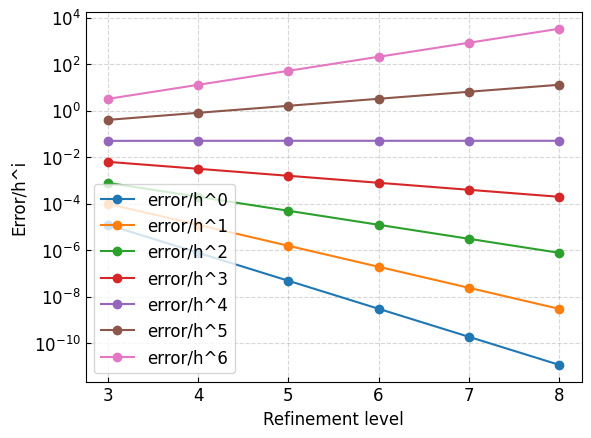

In [146]:
for i in range ( 6 + 1 ) :

    plt.plot(idx_arr, err_arr/h_arr**(i), 'o-',label=f'error/h^{i}')

# plt.xscale('log')
plt.yscale('log')
plt.grid(ls='--',alpha=0.5)
plt.xlabel('Refinement level')
plt.ylabel('Error/h^i')
plt.tick_params(axis='both',which='both', direction='in')
plt.legend();

Part 1 Problem no. 3 : 

In [147]:
offsets13 = [ -5 , -4 , -3 , -2 , -1 , 0 ]
offsets13_arr = np.array(offsets13)
order13 = 2

weights13 = fd_weights ( offsets13 , order13 , True ).T

                                 ⎡-5/6 ⎤      
⎡  1      1     1     1   1   1⎤ ⎢     ⎥   ⎡0⎤
⎢                              ⎥ ⎢ 61  ⎥   ⎢ ⎥
⎢ -5     -4     -3   -2   -1  0⎥ ⎢ ──  ⎥   ⎢0⎥
⎢                              ⎥ ⎢ 12  ⎥   ⎢ ⎥
⎢ 25     16     9     4   1   0⎥ ⎢     ⎥   ⎢2⎥
⎢                              ⎥⋅⎢ -13 ⎥ = ⎢ ⎥
⎢-125    -64   -27   -8   -1  0⎥ ⎢     ⎥   ⎢0⎥
⎢                              ⎥ ⎢107/6⎥   ⎢ ⎥
⎢ 625    256    81   16   1   0⎥ ⎢     ⎥   ⎢0⎥
⎢                              ⎥ ⎢-77/6⎥   ⎢ ⎥
⎣-3125  -1024  -243  -32  -1  0⎦ ⎢     ⎥   ⎣0⎦
                                 ⎣15/4 ⎦      


In [148]:
"""
Name: symbolic moments tester
Purpose: compute moments symbolically to show order
Author: Joshua Belieu | Fletch
Date written: 2025-09-01
Last modified: 2025-09-10
Inputs:
- offsets : array-like. collection of stencil points
- weights : array-like. collection of weights calculated from offsets.
Outputs:
- moments : sympy matrix. the vector of moments.
Dependencies:
- fd_weights
"""

'''
compound list comprehension to setup 2d list and convert to matrix object in 
sympy. just wrap the weights with the Matrix function. matrix multiply to get
moments vector (must transpose weights cause of shape shenanigans)
'''

offsets13_mat = sp.Matrix ( [ [ off ** i for off in offsets13 ] for i in range(len(offsets13)+1) ] )
weights13_mat = sp.Matrix ( weights13 )

moments = offsets13_mat*weights13_mat.T

"""
results indicate k* = 6 and so,
p = k* - d = 4
"""

moments


Matrix([
[   0],
[   0],
[   2],
[   0],
[   0],
[   0],
[-548]])

In [149]:
'''
recall of error and order tester
'''

f = lambda x : np.exp ( x )
f_2prime = lambda x : np.exp ( x )
x0 = 0.

idx_arr = np.arange ( 1 , 7 + 1 )
err_arr13 = np.zeros ( len ( idx_arr ) )
h_arr = 2. ** ( -idx_arr )

head_str = f"|{'idx':^4}|{'h=2^-idx':^11}|{'approximation':^18}|{'error':^11}|{'error/h^4':^11}|"
print('='*len(head_str))
print(head_str)
print('-'*len(head_str))

for i in idx_arr :

    h = 2. ** ( -i )

    f_arr = f(x0+h*offsets13_arr)
    approx13 = np.dot(weights13,f_arr)[0] / h ** 2
    error13 = np.abs(approx13-f_2prime(x0))
    err_arr13[i-3] = error13
    
    form_str = f"|{str(i).zfill(2):^4}|{h:^11.3e}|{approx13:^18}|{error13:^11.3e}|{error13/h**4:^11.4e}|"
    print(form_str)

print('='*len(head_str))

|idx | h=2^-idx  |  approximation   |   error   | error/h^4 |
-------------------------------------------------------------
| 01 | 5.000e-01 |0.982258707660812 | 1.774e-2  | 2.8386e-1 |
| 02 | 2.500e-01 |0.998208401019980 | 1.792e-3  | 4.5865e-1 |
| 03 | 1.250e-01 |0.999856240757310 | 1.438e-4  | 5.8884e-1 |
| 04 | 6.250e-02 |0.999989793599070 | 1.021e-5  | 6.6889e-1 |
| 05 | 3.125e-02 |0.999999319685230 | 6.803e-7  | 7.1336e-1 |
| 06 | 1.562e-02 |0.999999956075044 | 4.392e-8  | 7.3694e-1 |
| 07 | 7.812e-03 |0.999999997235136 | 2.765e-9  | 7.4219e-1 |


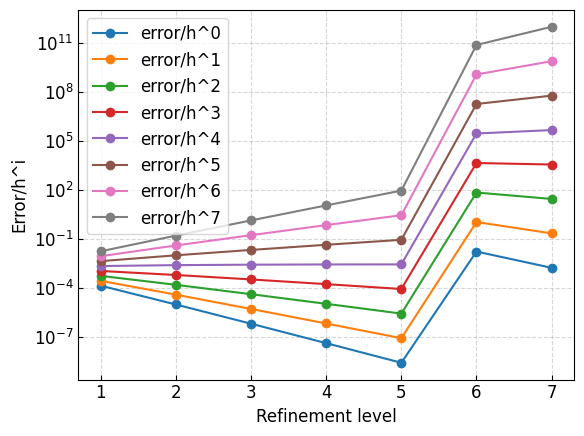

In [150]:
for i in range ( 7 + 1 ) :

    plt.plot(idx_arr, err_arr13/h_arr**(i), 'o-',label=f'error/h^{i}')

# plt.xscale('log')
plt.yscale('log')
plt.grid(ls='--',alpha=0.5)
plt.xlabel('Refinement level')
plt.ylabel('Error/h^i')
plt.tick_params(axis='both',which='both', direction='in')
plt.legend();

Part 2 : The Non-Uniform Grid

In [4]:
"""
Name: Error and step size method explorer
Purpose: to investigate the effect that step size has on a method. we specify
         500 maximum values of step size (H) and draw from a uniform 
         distribution three values on the interval [0,H] and use that to
         generate the coefficients of the ansatz. Then, we test the performance
         against a trial function and plot the behaviour
Author: Joshua Belieu | Fletch
Date written: 2025-09-06
Last modified: 2025-09-11
Inputs:
- f : array-like. function we will try to approximate an order d derivative.
- f_2prime : array-like. the 2nd order derivative of f.
- x0 : float/int. expansion point
- H_lower/higher : float. The bounds of the interval for H
Outputs:
- error_list : list. collection of errors for each value in H
- H_arr : numpy array. the values of H.
- plot : plot. log-log plot of H vs |Error|.
Dependencies:
- fd_weights
"""

f = lambda x : np.cos ( x )
f_2prime = lambda x : -np.cos ( x )
x2 = 0

H_lower = 1e-3
H_upper = 1e-1
H_arr = np.linspace ( H_lower , H_upper , int ( 5e2 ) )

error_list = []

rng = np.random.default_rng()
for H_val in H_arr :
    
    h1,h2,h3 = rng.uniform(0.,H_val,size=3)
    h_arr = np.array([ -h1,0,h2,h2+h3 ])
    f_arr = f(x2+h_arr)

    c1, c2, c3, c4 = sp.symbols('c1 c2 c3 c4')

    eq1 = sp.Eq(c1 + c2 + c3 + c4, 0) 
    eq2 = sp.Eq(-h1*c1 + h2*c3 + (h2+h3)*c4, 0)
    eq3 = sp.Eq((h1**2*c1 + h2**2*c3 + (h2+h3)**2*c4)/2, 1)
    eq4 = sp.Eq((-h1**3*c1 + h2**3*c3 + (h2+h3)**3*c4)/6, 0)

    c_vec = sp.solve([eq1, eq2, eq3, eq4], [c1, c2, c3, c4])

    '''
    convert sympy floats/array to numpy floats/array because np.log doesnt
    like sympy floats/arrays :(.
    '''

    c_arr = np.array([ float(c_vec[c]) for c in (c1,c2,c3,c4) ])
    approx = np.dot(c_arr,f_arr)
    error = np.abs(approx - f_2prime(x2))
    error_list.append(error)

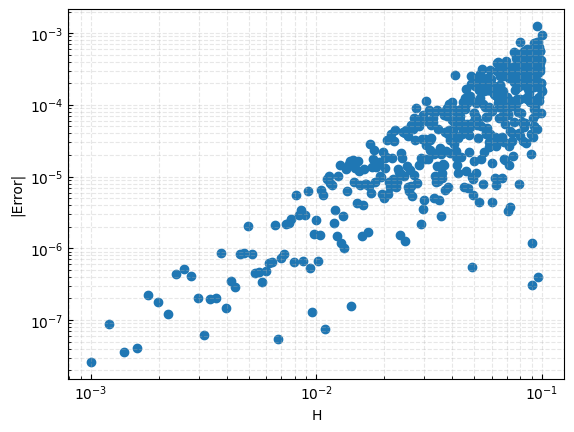

In [5]:
plt.scatter(H_arr,error_list)

plt.xlabel('H')
plt.ylabel('|Error|')
plt.grid(ls='--',which='both',alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both',which='both', direction='in');

-3.8031127737479125 1.973644440179718


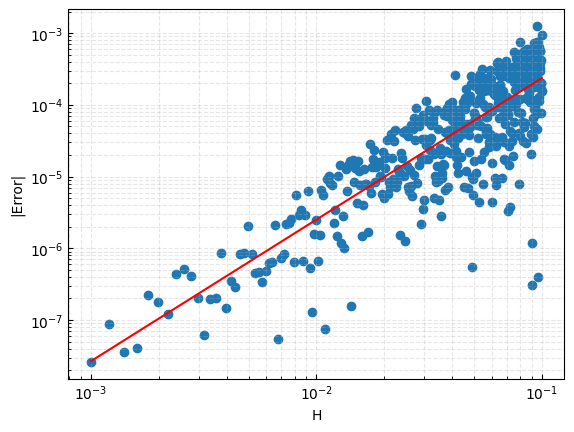

In [6]:
"""
Name: least squares analysis
Purpose: this calculates the vector x from Ax=b where A is a 2xlen(error)
         matrix where the left column is a vector of 1s and the right column
         is the log(H). b is the log(|error_list|)
Author: Joshua Belieu | Fletch
Date written: 2025-09-06
Last modified: 2025-09-11
Inputs:
- A : numpy array. 2xlen(error) where the left column is a vector of 1s and the
      right column is the log(H).
- b : numpy array. the log(|error_list|)
Outputs:
- K,p : float. the intercept and slope of the linear least squares fit.
- plot : the scatter plot from Error and step size method explorer with the
         line placed over top. the axis scales are already log-log so in stead
         of plotting K+log(H)*p you input e^(K)*H^p
Dependencies:
- Error and step size method explorer
"""

A = np.column_stack ( [np.ones_like(H_arr),np.log(H_arr)] )
b = np.log ( error_list )
x = np.linalg.lstsq ( A , b ,rcond=None)

K,p = x[0]

print(K,p)

plt.scatter(H_arr,error_list)
plt.plot(H_arr,np.exp(K)*H_arr**p,color='red')
plt.xlabel('H')
plt.ylabel('|Error|')
plt.grid(ls='--',which='both',alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both',which='both', direction='in');

Part 3 Problem 4 :

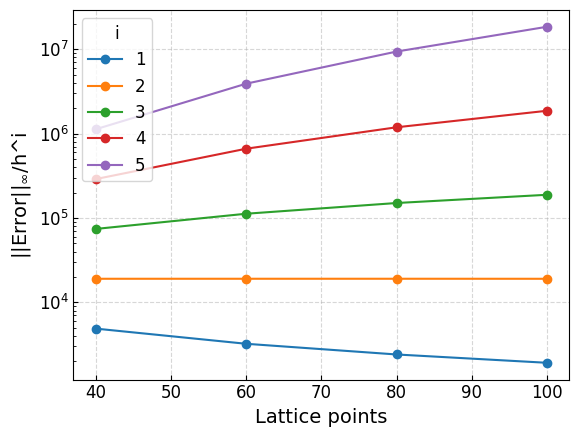

In [155]:
"""
Name: Sparse matrix solver
Purpose: establish a second order accuracy for this method/system at different
         grid spacings.
Author: Joshua Belieu | Fletch
Date written: 2025-09-13
Last modified: 2025-09-13
Inputs:
- x_low/high : float/int. the system domain limits.
- lattice_points : array-like. the dimensions of the discretized system, nxn.
- u_true : array-like. the analytic solution of the system.
- A[i,j] : float/int. these adjustments are due to the boundary values given
           in the problem statement. make sure they're accurate for your 
           system!
Outputs:
- plot : plot. a plot of the correlation between the lattic points and the max
         value in the absolute value of the difference in the approximation
         and analytic expression divided by some order of the lattice spacing,
         h. for reference, h=x_upp/(lattice_point-1)
Dependencies:
- None.
"""

'''
bounds of the system
'''

x_low = 0.; x_upp = 10.

'''
the dimensions of the array, nxn. the spacings are h and are used in the plot.
max_err_ls is max error list and is used to store the max error for each
lattice size.
'''

lattice_points = np.array([40,60,80,100])
lattice_spacing = x_upp/(lattice_points-1)
max_err_ls = []

'''
for each lattice size do; calculate step size, model the true function,
generate a sparse matrix and adjust the first and last rows according to 
boundary values, discretize the RHS of the ODE scaled by h^2, and solve for the
eigenfunction using spsolve. take the |difference| of the approximation and the
true function, extract the max value and add it to max_err_ls. 
'''

for n in lattice_points :

    h = x_upp / (n-1)
    x_arr = np.linspace(x_low,x_upp,n)
    u_true = lambda x: np.exp(x_upp)/(2*np.cos(x_upp))*(np.cos(x)+np.sin(x))-0.5*np.exp(x)


    e = np.ones(n)
    A = diags([e, (-2+h**2)*e, e], offsets=[-1,0,1], shape=(n,n)).tolil()
    A[0,0] = -3/(2*h) - 1
    A[0,1] = 4/(2*h)
    A[0,2] = -1/(2*h)

    A[-1, -3] = 1/(2*h)
    A[-1, -2] = -2/h
    A[-1, -1] = 3/(2*h) + 1

    f = -np.exp(x_arr)*h**2
    u = spsolve(A.tocsr(),f)

    diff = u-u_true(x_arr)

    error = np.abs(diff)
    max_err = np.max(error)
    max_err_ls.append(max_err)

'''
for different orders, plot lattice points against max_err_ls/h^order to test 
what order our method is.
'''

for i in range (1,6) :

    plt.plot(lattice_points,
             np.array(max_err_ls)/lattice_spacing**i,
             marker='o',
             label=i);

plt.xlabel('Lattice points',fontsize=14)
plt.ylabel(r'||Error||$_{\infty}$/h^i',fontsize=14)
plt.yscale('log')
plt.grid(ls='--',alpha=0.5)
plt.tick_params(axis='both',which='both', direction='in')
plt.legend(title='i',loc='upper left');

In [4]:
offsets = [ 0 , -1 , -2 , -3 , -4 ]

fd_weights ( offsets , 1 , True )

                      ⎡ 25 ⎤      
⎡1  1   1    1    1 ⎤ ⎢ ── ⎥   ⎡0⎤
⎢                   ⎥ ⎢ 12 ⎥   ⎢ ⎥
⎢0  -1  -2  -3   -4 ⎥ ⎢    ⎥   ⎢1⎥
⎢                   ⎥ ⎢ -4 ⎥   ⎢ ⎥
⎢0  1   4    9   16 ⎥⋅⎢    ⎥ = ⎢0⎥
⎢                   ⎥ ⎢ 3  ⎥   ⎢ ⎥
⎢0  -1  -8  -27  -64⎥ ⎢    ⎥   ⎢0⎥
⎢                   ⎥ ⎢-4/3⎥   ⎢ ⎥
⎣0  1   16  81   256⎦ ⎢    ⎥   ⎣0⎦
                      ⎣1/4 ⎦      


Matrix([
[25/12],
[   -4],
[    3],
[ -4/3],
[  1/4]])

In [4]:
offsets = [-2,-1,0,1,2]
fd_weights(offsets,2,True)

⎡1   1   1  1  1 ⎤ ⎡-1/12⎤   ⎡0⎤
⎢                ⎥ ⎢     ⎥   ⎢ ⎥
⎢-2  -1  0  1  2 ⎥ ⎢ 4/3 ⎥   ⎢0⎥
⎢                ⎥ ⎢     ⎥   ⎢ ⎥
⎢4   1   0  1  4 ⎥⋅⎢-5/2 ⎥ = ⎢2⎥
⎢                ⎥ ⎢     ⎥   ⎢ ⎥
⎢-8  -1  0  1  8 ⎥ ⎢ 4/3 ⎥   ⎢0⎥
⎢                ⎥ ⎢     ⎥   ⎢ ⎥
⎣16  1   0  1  16⎦ ⎣-1/12⎦   ⎣0⎦


Matrix([
[-1/12],
[  4/3],
[ -5/2],
[  4/3],
[-1/12]])

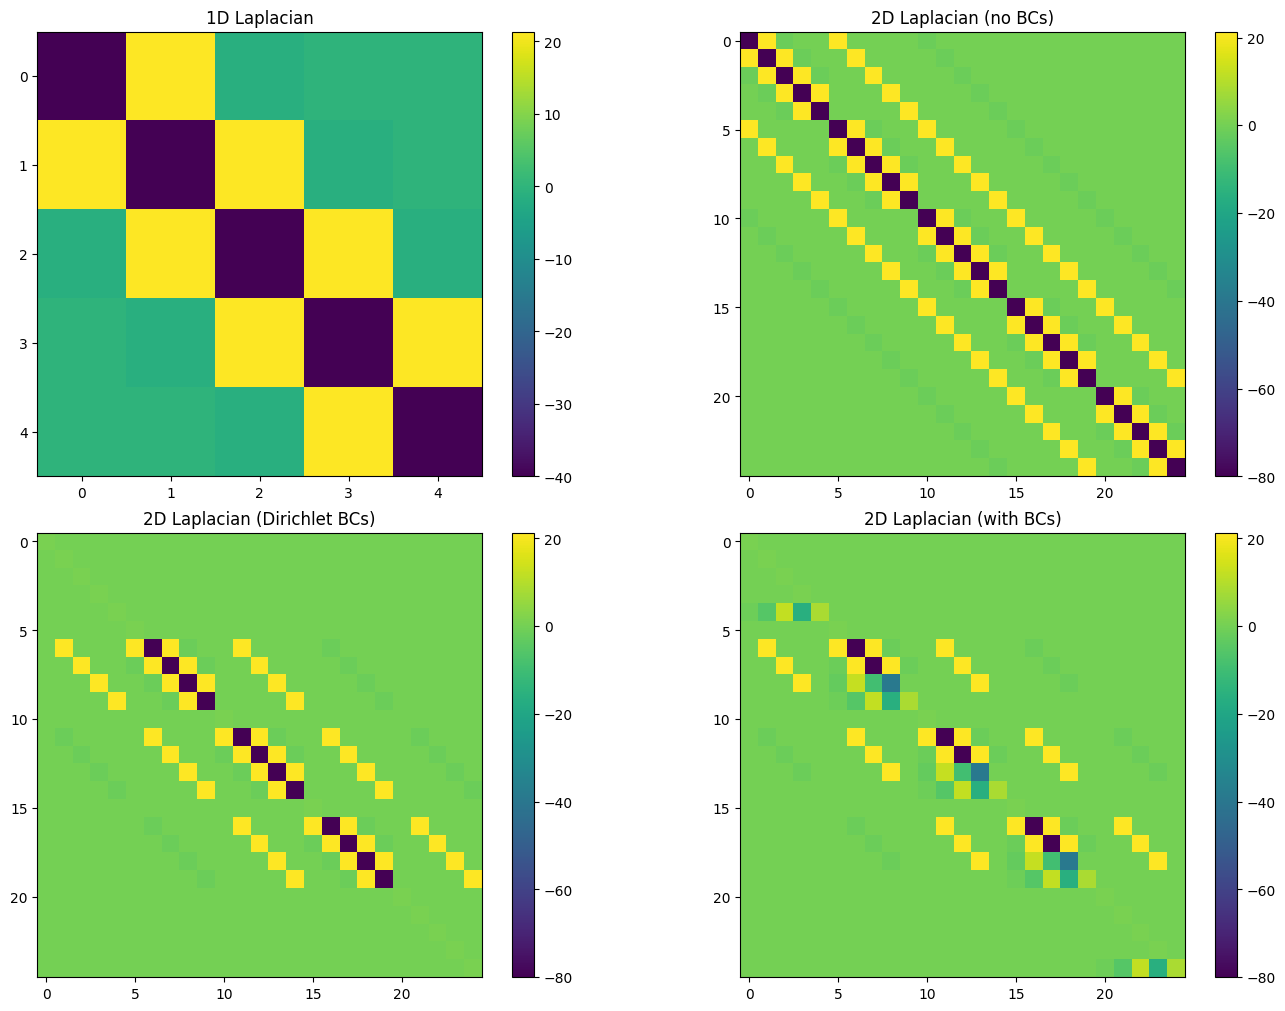

In [ ]:
"""
Name: 2d laplacian plotter
Purpose: plot the laplacian at each development step to amake sure i dont guff
         it up.
Author: Joshua Belieu | Fletch
Date written: 2025-09-17
Last modified: 2025-09-20
Inputs:
- n : int. number of lattice points
- weights : array-like. container of stencil weights.
- offsets : array-like. container of stencil offsets. elements represent 
            distance from main diagonal.
- no name : floats/ints. inside the for loop are the weights of the neumann
            stencil which are placed according to offsets. example :

            A_2D[loop index, neumann_offset] = neumann_weight

Outputs:
- plots : plot. 2 plots. a 1x3 plot of the 1d laplacian, a 2d laplacian derived
          using the kronecker product, and a 2d laplacian with neumann 
          conditions baked in at one boundary. a second plot which is the third
          plot of the 1x3 is in the next cell with the values painted at each
          lattice point.
Dependencies:
- None
"""

n = 5 # 1D lattice points
h = 1/(n-1) # step size
# h = np.sqrt(1/12) # test value

weights = [-1/12, 4/3, -5/2, 4/3, -1/12] # 1d laplacian weights
offsets = [-2, -1, 0, 1, 2] # 1d laplacian offsets

'''
the 1d stencil of a second derivative operator
'''

a_1d = diags(np.array(weights)/(h**2), offsets, shape=(n,n))

'''
identity is a matrix diag(1). the 2d laplacian is the kronecker product of
the 1d laplacian and the identity in swapped order summed together. the
dimensions are now n^2 x n^2.
'''

identity = eye(n)
a_2d = kron(identity, a_1d) + kron(a_1d,identity)
a_2d_nobc = a_2d.copy()
a_2d = a_2d.tolil()

'''
b is the Dirichlet boundary conditions adjustment vector. this will store the
points in the stencil that are known and will deduct from the f vector to form
a rhs vector for our pde.
'''

b = np.zeros(n*n)

'''
dimensions of domain.
'''

L = 1 ; H = 1
x = np.linspace ( 0 , L , n ); y = np.linspace ( 0 , H , n );

'''
functions along the boundaries.
'''

f1 = x / L ; f2 = (L-x)/L ; g = ((H-y)/H)**2

'''
a big loop to set the boundary conditions. in essence, we clear the rows out 
that correspond to the Dirichlet boundaries and set the diagonal to 1. we then
store those values in b to subtract from f later. the neumann condition is set
using a 4th order one-sided stencil (under construction).
'''

for idx in range ( n ) :

    left_bound_idx = idx * n

    a_2d [ left_bound_idx ,: ] = 0
    a_2d [ left_bound_idx , left_bound_idx ] = 1
    b [ left_bound_idx ] = f1 [ idx ]

    bottom_bound_idx = idx

    a_2d [ bottom_bound_idx ,: ] = 0
    a_2d [ bottom_bound_idx , bottom_bound_idx ] = 1

    upper_bound_idx = n * ( n - 1 ) + idx

    a_2d [ upper_bound_idx ,: ] = 0
    a_2d [ upper_bound_idx , upper_bound_idx ] = 1
    b [ upper_bound_idx ] = f1 [ idx ]

a_2d_dirichlet = a_2d.copy()

for idx in range ( n ) :

    neumann_row_idx = idx * n + n - 1

    # interior_row_idx = neumann_row_idx - 1       # last interior column touching ghost

    # ghost_coef = a_2d[interior_row_idx, neumann_row_idx]
    # if ghost_coef != 0:
    #     # remove ghost contribution
    #     a_2d[interior_row_idx, neumann_row_idx] = 0

    #     # redistribute ghost onto interior neighbors using 4th-order formula
    #     a_2d[interior_row_idx, interior_row_idx + 0] += (48/25) * ghost_coef   # u_{n-1}
    #     a_2d[interior_row_idx, interior_row_idx - 1] += (-36/25) * ghost_coef  # u_{n-2}
    #     a_2d[interior_row_idx, interior_row_idx - 2] += (16/25) * ghost_coef   # u_{n-3}
    #     a_2d[interior_row_idx, interior_row_idx - 3] += (-3/25) * ghost_coef   # u_{n-4}

    # a_2d[neumann_row_idx, :] = 0
    # a_2d[neumann_row_idx, neumann_row_idx] = 25/(12*h)
    # a_2d[neumann_row_idx, neumann_row_idx - 1] = -48/(12*h)
    # a_2d[neumann_row_idx, neumann_row_idx - 2] = 36/(12*h)
    # a_2d[neumann_row_idx, neumann_row_idx - 3] = -16/(12*h)
    # a_2d[neumann_row_idx, neumann_row_idx - 4] = -3/(12*h)
    # b[neumann_row_idx] = 0


    # a_2d [ neumann_row_idx ,:  ] = 0
    # a_2d [ neumann_row_idx , neumann_row_idx ] = 25/(12*h)
    # a_2d [ neumann_row_idx , neumann_row_idx -1 ] = -48/(12*h)
    # a_2d [ neumann_row_idx , neumann_row_idx -2 ] = 36/(12*h)
    # a_2d [ neumann_row_idx , neumann_row_idx -3 ] = -16/(12*h)
    # a_2d [ neumann_row_idx , neumann_row_idx -4 ] = -3/(12*h)

    # if idx > 0 and idx != n-1 :

    #     a_2d [ neumann_row_idx ,:  ] = 0
    #     a_2d [ neumann_row_idx , neumann_row_idx ] = 25/(12*h)
    #     a_2d [ neumann_row_idx , neumann_row_idx -1 ] = -48/(12*h)
    #     a_2d [ neumann_row_idx , neumann_row_idx -2 ] = 36/(12*h)
    #     a_2d [ neumann_row_idx , neumann_row_idx -3 ] = -16/(12*h)
    #     a_2d [ neumann_row_idx , neumann_row_idx -4 ] = -3/(12*h)

    a_2d [ neumann_row_idx , neumann_row_idx ] = 0
    a_2d [ neumann_row_idx , neumann_row_idx -1 ] = a_2d [ neumann_row_idx , neumann_row_idx -1 ] -48/(25*12*h**2)
    a_2d [ neumann_row_idx , neumann_row_idx -2 ] = a_2d [ neumann_row_idx , neumann_row_idx -2 ] + 36/(25*12*h**2)
    a_2d [ neumann_row_idx , neumann_row_idx -3 ] = a_2d [ neumann_row_idx , neumann_row_idx -3 ] -16/(25*12*h**2)
    a_2d [ neumann_row_idx , neumann_row_idx -4 ] = a_2d [ neumann_row_idx , neumann_row_idx -4 ] -3/(25*12*h**2)

    b [ neumann_row_idx ] = 0.

'''
setting up the f vector as consistent with the problem statement.
'''

f = np.zeros((n,n))

for i in range ( n ) :
    for j in range ( n ) :
        if 1/3 <= x[i] <= 1/2 and 1/2 <= y[j] <= 2/3 :
            f[i,j] = -1

f = f.flatten()

rhs = f - b

'''
plot the derivative coefficient matrix at each development step.
''';

fig, axs = plt.subplots(2, 2, figsize=(14,10), constrained_layout=True)

im0 = axs[0][0].imshow(a_1d.toarray(), cmap="viridis", interpolation="none")
axs[0][0].set_title("1D Laplacian")
plt.colorbar(im0, ax=axs[0][0])

im1 = axs[0][1].imshow(a_2d_nobc.toarray(), cmap="viridis", interpolation="none")
axs[0][1].set_title("2D Laplacian (no BCs)")
plt.colorbar(im1, ax=axs[0][1])

im2 = axs[1][0].imshow(a_2d_dirichlet.toarray(), cmap="viridis", interpolation="none")
axs[1][0].set_title("2D Laplacian (Dirichlet BCs)")
plt.colorbar(im2, ax=axs[1][0]);

im3 = axs[1][1].imshow(a_2d.toarray(), cmap="viridis", interpolation="none")
axs[1][1].set_title("2D Laplacian (with BCs)")
plt.colorbar(im3, ax=axs[1][1]);

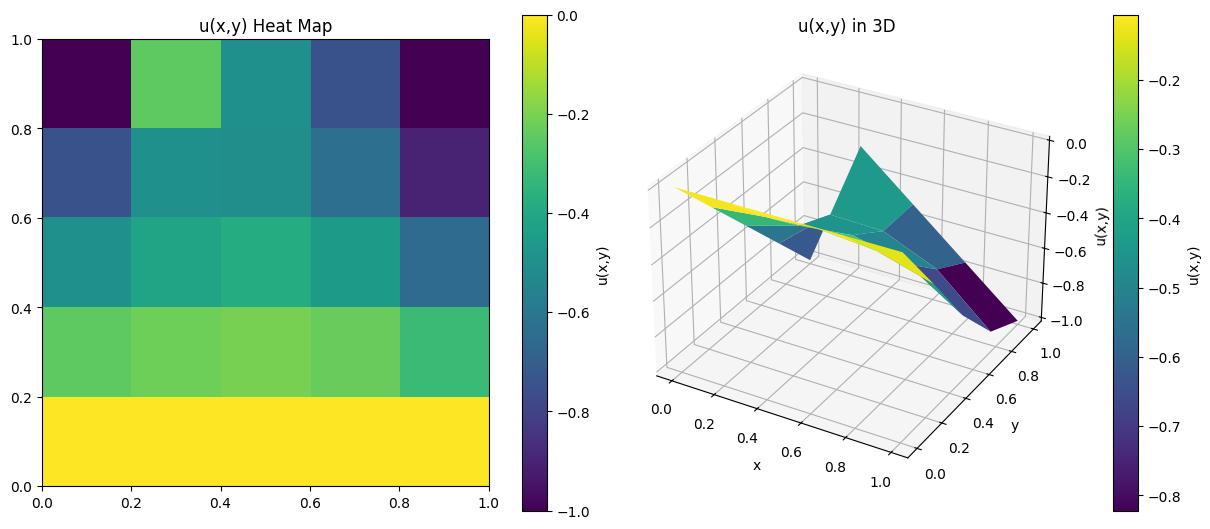

In [22]:
'''
solve the system we setup and plot the results as a heatmap and a 3d surface.
'''

u = spsolve(a_2d.tocsr(), rhs)
U = u.reshape((n, n))

X, Y = np.meshgrid(x, y)

fig = plt.figure ( figsize = ( 12 , 10 ) , constrained_layout=True )
ax1 = fig.add_subplot ( 121 )
ax2 = fig.add_subplot ( 122 , projection = '3d' )

im1 = ax1.imshow(u.reshape((n,n)), origin="lower", extent=[0,1,0,1])
fig.colorbar(im1 , label="u(x,y)",ax=ax1 , shrink = 0.5 )
ax1.set_title("u(x,y) Heat Map")

im2 = ax2.plot_surface(X, Y, U, cmap='viridis', edgecolor="none")
fig.colorbar(im2 , shrink = 0.5 , aspect=20, label="u(x,y)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("u(x,y)")
ax2.set_title("u(x,y) in 3D");

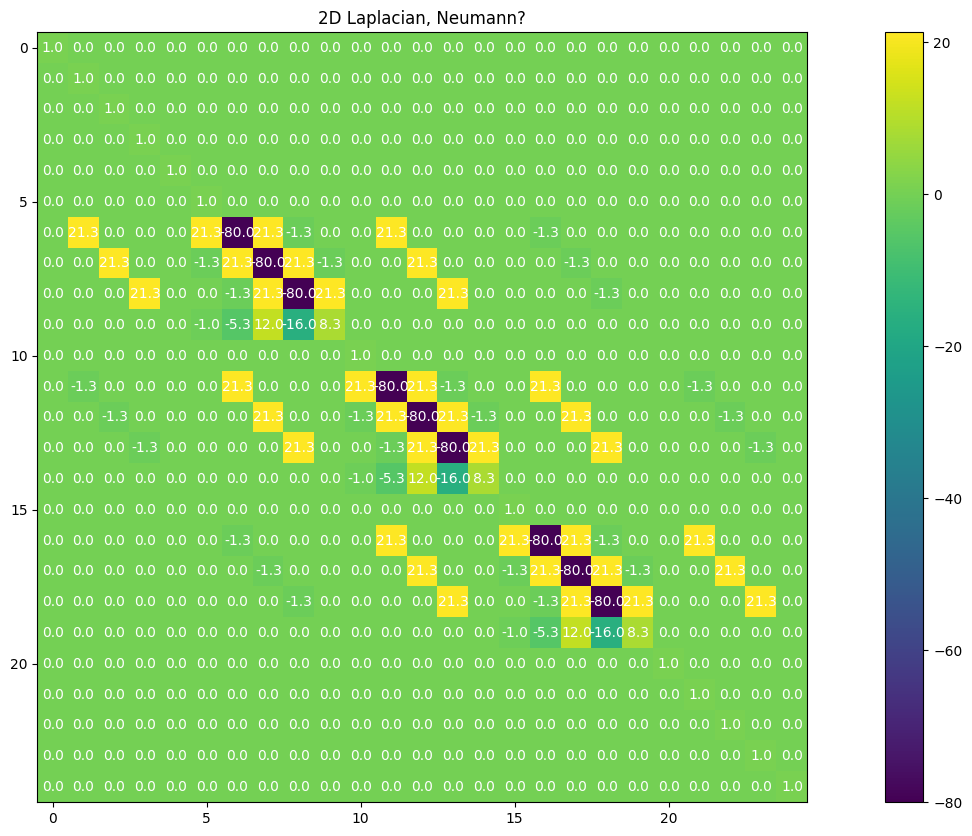

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

A_arr = a_2d.toarray()

im = ax.imshow(A_arr, cmap='viridis', interpolation='none')
fig.colorbar(im, ax=ax)
ax.set_title('2D Laplacian, Neumann?')

for i in range(n*n):
    for j in range(n*n):
        ax.text(j, i, f"{A_arr[i,j]:.1f}",
                ha="center", va="center",
                color="w", fontsize=10)